In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import requests
import bs4
import textblob

In [3]:
wiki = requests.get("https://en.wikipedia.org/wiki/India")

In [4]:
from bs4 import BeautifulSoup

In [5]:
india= BeautifulSoup(wiki.content,'lxml') #wikipedia uses a  format lxml(html parser)

In [6]:
india = india.getText(strip=True) #stripping only the text we still need clean up as [],digits

In [7]:
india

'India - Wikipediadocument.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"d144d20a-c084-4e7e-95e2-ce9d277c7117","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"India","wgTitle":"India","wgCurRevisionId":1135476101,"wgRevisionId":1135476101,"wgArticleId":14533,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Wikipedia articles needing page number citations from April 2022","Articles with short description","Short description matches Wikidata","Wikipedia indefinitely move-protected pages","Featured articles","Wikipedia extended-confirmed-protected pages","Use Indian English from May 2020",\n"All Wiki

In [8]:
import re

In [9]:
india = re.sub(r'\[\d+\]', "", india) #for digits

In [10]:
india = re.sub(r'\[\w+\]', "", india) #for words

In [11]:
india = re.sub('[0-9]+', "", india)

In [12]:
india

'India - Wikipediadocument.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"dda-c-ee-e-cedc","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":,"wgPageName":"India","wgTitle":"India","wgCurRevisionId":,"wgRevisionId":,"wgArticleId":,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Wikipedia articles needing page number citations from April ","Articles with short description","Short description matches Wikidata","Wikipedia indefinitely move-protected pages","Featured articles","Wikipedia extended-confirmed-protected pages","Use Indian English from May ",\n"All Wikipedia articles written in Indian English","Use dmy date

In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
from nltk.tokenize import sent_tokenize

In [15]:
sentence = sent_tokenize(india)

In [16]:
len(sentence)

820

In [17]:
sentence

['India - Wikipediadocument.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"dda-c-ee-e-cedc","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":,"wgPageName":"India","wgTitle":"India","wgCurRevisionId":,"wgRevisionId":,"wgArticleId":,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Wikipedia articles needing page number citations from April ","Articles with short description","Short description matches Wikidata","Wikipedia indefinitely move-protected pages","Featured articles","Wikipedia extended-confirmed-protected pages","Use Indian English from May ",\n"All Wikipedia articles written in Indian English","Use dmy dat

In [18]:
from textblob import TextBlob

In [19]:
def analyze_sentiment(tweet):
    analysis=TextBlob(tweet)
    if analysis.sentiment.polarity >0:
        return "Positive"
    elif analysis.sentiment.polarity == 0:
        return "Neutral"
    else:
        return "Negative"

In [20]:
sentence=pd.DataFrame(sentence)

In [21]:
sentence.columns=["sentence"]

In [22]:
sentence['sentiment']=[str(analyze_sentiment(x)) for x in sentence.sentence]

In [23]:
sentence.sentiment.value_counts()

Neutral     498
Positive    244
Negative     78
Name: sentiment, dtype: int64

In [24]:
from nltk.tokenize import sent_tokenize

In [25]:
from textblob.en.sentiments import word_tokenize
indiawords=word_tokenize(india)

In [26]:
indiawords = [word for word in indiawords if word.isalnum()]

In [27]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
stop_words = set(stopwords.words('english'))

In [29]:
indiawords = [word for word in indiawords if not str.lower(word) in stop_words]

In [30]:
from nltk.probability import FreqDist

In [31]:
wordfreq= FreqDist(indiawords)

In [32]:
wordfreq #output has lot of special characters and random words

FreqDist({'India': 463, 'ISBN': 158, 'Indian': 145, 'pp': 120, 'retrieved': 114, 'Retrieved': 91, 'fromthe': 73, 'Press': 72, 'University': 68, 'PDF': 60, ...})

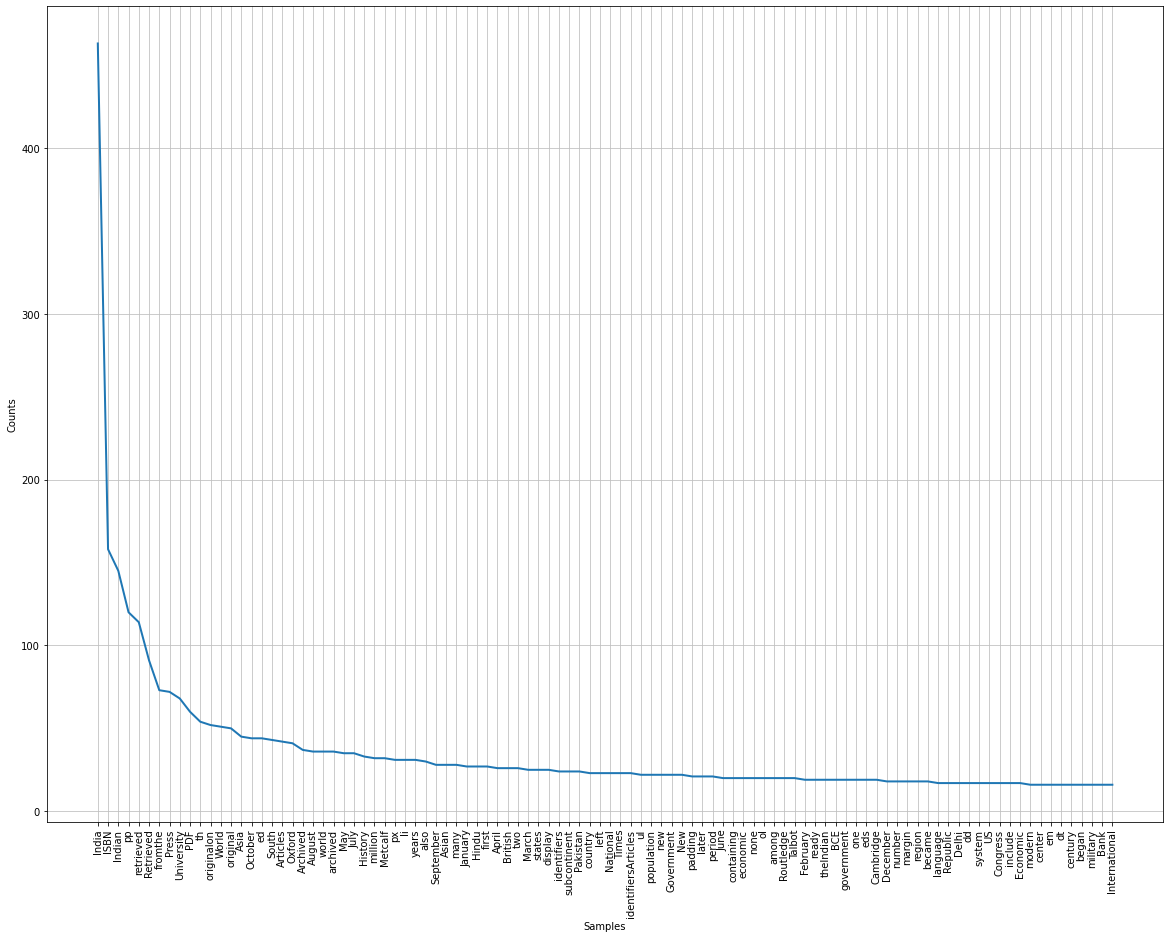

In [33]:
plt.figure(figsize=(20,15))
wordfreq.plot(100,cumulative=False)

In [34]:
indiawords=[w for w in indiawords if not w in ['ISBN', 'pp', 'PDF', 'fromtthe', 'ed', 'th', 'also','Press']]

In [35]:
from wordcloud import WordCloud

In [36]:
india_words = (" ").join(indiawords)

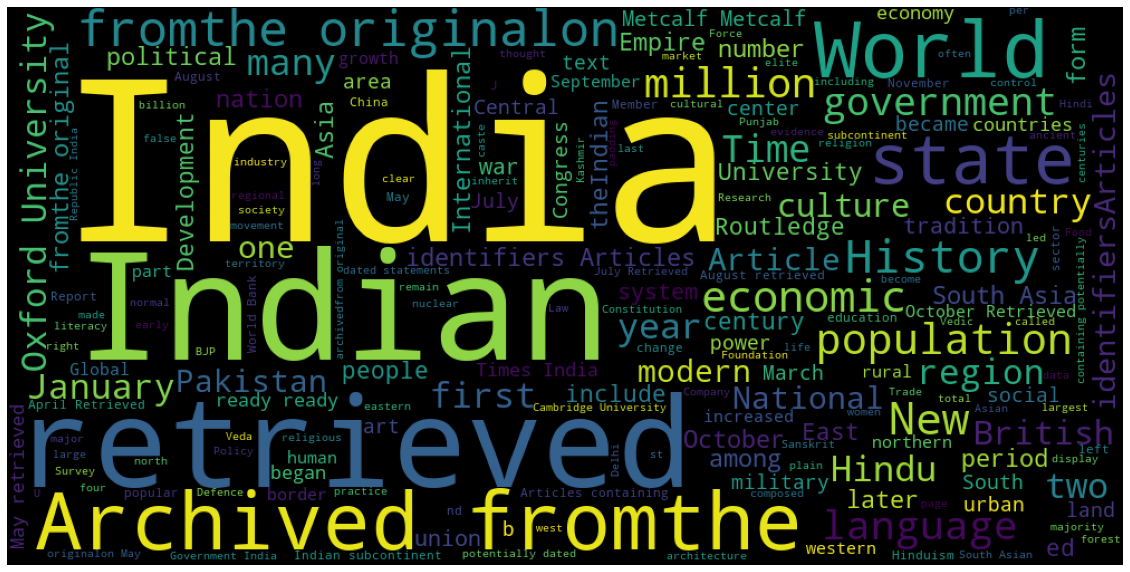

In [37]:
wordcloud = WordCloud(width=1000,height=500).generate(india_words)
plt.figure(figsize=(20,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()